# Importing relevant libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import time
from datetime import time

from sklearn.preprocessing import MinMaxScaler #map min value to 0 and max value to 1
from sklearn.preprocessing import StandardScaler #for each value it will subtract the mean value, shifts the axis, and the ..
from sklearn.model_selection import train_test_split
import scipy.stats as st

from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
# To make run all you ask in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Preliminary data exploration

In [3]:
data_water= pd.read_csv("/Users/deshdeepak/ironhack/UNHCR/new_data/drinking_water.csv")
data_sanitation = pd.read_csv("/Users/deshdeepak/ironhack/UNHCR/new_data/sanitation.csv")
data_asylum = pd.read_excel("/Users/deshdeepak/ironhack/UNHCR/new_data/asylum_applications-2.xlsx")
data_refugees = pd.read_excel("/Users/deshdeepak/ironhack/UNHCR/new_data/demographics2.xlsx")
voice= pd.read_excel("/Users/deshdeepak/ironhack/UNHCR/new_data/Voice.xlsx")
political=pd.read_excel("/Users/deshdeepak/ironhack/UNHCR/new_data/Political.xlsx")
government=pd.read_excel("/Users/deshdeepak/ironhack/UNHCR/new_data/Government.xlsx")
regulatory= pd.read_excel("/Users/deshdeepak/ironhack/UNHCR/new_data/Regulatory.xlsx")
rule=pd.read_excel("/Users/deshdeepak/ironhack/UNHCR/new_data/Rule of Law.xlsx")
corruption=pd.read_excel("/Users/deshdeepak/ironhack/UNHCR/new_data/Control of Corruption.xlsx")
vih= pd.read_excel("/Users/deshdeepak/ironhack/UNHCR/new_data/VIH.xlsx")
intestinal= pd.read_excel("/Users/deshdeepak/ironhack/UNHCR/new_data/intestinal.xlsx")
form_government = pd.read_excel("/Users/deshdeepak/ironhack/UNHCR/new_data/form_government.xlsx")

In [4]:
data_water.shape
data_sanitation.shape
data_asylum.shape
data_refugees.shape
voice.shape
political.shape
government.shape
regulatory.shape
rule.shape
corruption.shape
vih.shape
intestinal.shape
form_government.shape

(3774, 8)

(3828, 8)

(13400, 3)

(9577, 3)

(864, 3)

(864, 3)

(864, 3)

(864, 3)

(864, 3)

(864, 3)

(880, 3)

(864, 3)

(54, 3)

In [5]:

form_government = form_government.drop(['Unnamed: 2'],axis=1)
form_government.head()

,Country,Form of Government
0,Algeria,parliamentary unitary republic
1,Angola,presidential unitary republic
2,Benin,presidential unitary republic
3,Botswana,parliamentary unitary republic
4,Burkina Faso,presidential unitary republic


In [6]:
data_water.info()
data_sanitation.info()
data_asylum.info()
data_refugees.info()
voice.info()
political.info()
government.info()
regulatory.info()
rule.info()
corruption.info()
vih.info()
intestinal.info()
form_government.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3774 entries, 0 to 3773
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ISO3            3774 non-null   object 
 1   Country         3774 non-null   object 
 2   Residence Type  3774 non-null   object 
 3   Service Type    3774 non-null   object 
 4   Year            3774 non-null   int64  
 5   Coverage        3774 non-null   float64
 6   Population      3774 non-null   float64
 7   Service level   3774 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 236.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3828 entries, 0 to 3827
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ISO3            3828 non-null   object 
 1   Country         3828 non-null   object 
 2   Residence Type  3828 non-null   object 
 3   Service Type    3828 non-null   object 
 4  

In [7]:
def clean(x):
    if x in ['Cape Verde']:
        return 'Cabo Verde'
    elif x in ['Congo, Rep.']:
        return 'Congo'
    elif x in ['Congo, Dem. Rep.']:
        return 'Democratic Republic of the Congo'
    elif x in ['Egypt, Arab Rep.']:
        return 'Egypt'
    elif x in ['Gambia, The']:
        return 'Gambia'
    elif x in ['Tanzania']:
        return 'United Republic of Tanzania'
    else:
        return x
    
def clean2(x):
    if x in ['Central African Rep.']:
        return 'Central African Republic'
    elif x in ['Dem. Rep. of the Congo']:
        return 'Democratic Republic of the Congo'
    elif x in ['United Rep. of Tanzania']:
        return 'United Republic of Tanzania'
    else:
        return x
    

In [8]:
voice['Country'] = list(map(clean, voice['Country']))
political['Country'] = list(map(clean, political['Country']))
government['Country'] = list(map(clean, government['Country']))
regulatory['Country'] = list(map(clean, regulatory['Country']))
rule['Country'] = list(map(clean, rule['Country']))
corruption['Country'] = list(map(clean, corruption['Country']))
data_asylum['Country of origin'] = list(map(clean2, data_asylum['Country of origin']))
data_refugees['Country of origin'] = list(map(clean2, data_refugees['Country of origin']))




In [9]:
data_water = data_water.rename(columns={'Coverage':'water_coverage','Population':'water_population'})
data_sanitation= data_sanitation.rename(columns={'Coverage':'sanitation_coverage','Population':'sanitation_population'})


data_water.columns = data_water.columns.str.replace(' ','_')
data_water.columns = data_water.columns.str.lower()

data_sanitation.columns = data_sanitation.columns.str.replace(' ','_')
data_sanitation.columns = data_sanitation.columns.str.lower()

data_asylum.columns = data_asylum.columns.str.replace(' ','_')
data_asylum.columns = data_asylum.columns.str.lower()

data_refugees.columns = data_refugees.columns.str.replace(' ','_')
data_refugees.columns = data_refugees.columns.str.lower()

voice.columns = voice.columns.str.replace(' ','_')
voice.columns = voice.columns.str.lower()

government.columns = government.columns.str.replace(' ','_')
government.columns = government.columns.str.lower()

political.columns = political.columns.str.replace(' ','_')
political.columns = political.columns.str.lower()

regulatory.columns = regulatory.columns.str.replace(' ','_')
regulatory.columns = regulatory.columns.str.lower()

rule.columns = rule.columns.str.replace(' ','_')
rule.columns = rule.columns.str.lower()

corruption.columns = corruption.columns.str.replace(' ','_')
corruption.columns = corruption.columns.str.lower()

vih.columns = vih.columns.str.replace(' ','_')
vih.columns = vih.columns.str.lower()

intestinal.columns = intestinal.columns.str.replace(' ','_')
intestinal.columns = intestinal.columns.str.lower()

form_government.columns = form_government.columns.str.replace(' ','_')
form_government.columns = form_government.columns.str.lower()

In [10]:
data_water = data_water.drop(['iso3','residence_type','service_type'], axis = 1)
data_sanitation = data_sanitation.drop(['iso3','residence_type','service_type'], axis = 1)

In [11]:
data_water.shape
data_sanitation.shape
data_asylum.shape
data_refugees.shape
voice.shape
political.shape
government.shape
regulatory.shape
rule.shape
corruption.shape
vih.shape
intestinal.shape
form_government.shape

(3774, 5)

(3828, 5)

(13400, 3)

(9577, 3)

(864, 3)

(864, 3)

(864, 3)

(864, 3)

(864, 3)

(864, 3)

(880, 3)

(864, 3)

(54, 2)

In [12]:
data_water.info()
data_sanitation.info()
data_asylum.info()
data_refugees.info()
voice.info()
political.info()
government.info()
regulatory.info()
rule.info()
corruption.info()
vih.info()
intestinal.info()
form_government.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3774 entries, 0 to 3773
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           3774 non-null   object 
 1   year              3774 non-null   int64  
 2   water_coverage    3774 non-null   float64
 3   water_population  3774 non-null   float64
 4   service_level     3774 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 147.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3828 entries, 0 to 3827
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                3828 non-null   object 
 1   year                   3828 non-null   int64  
 2   sanitation_coverage    3828 non-null   float64
 3   sanitation_population  3828 non-null   float64
 4   service_level          3828 non-null   object 
dtypes: float64(2), int64(1), o

In [13]:

voice.value_counts()
political.value_counts()
government.value_counts()
form_government.value_counts()


country     year  voice_and_accountability_
Algeria     2002  18.905472                    1
Mozambique  2004  47.596153                    1
            2006  44.711540                    1
            2007  45.673077                    1
            2008  45.192307                    1
                                              ..
Eswatini    2002  9.950249                     1
            2003  6.965174                     1
            2004  7.692307                     1
            2005  8.173077                     1
Zimbabwe    2017  14.778325                    1
Length: 855, dtype: int64

country     year  political_stability_and_absence_of_violence
Algeria     2002  6.878307                                       1
Mozambique  2004  44.660194                                      1
            2006  61.835751                                      1
            2007  55.555557                                      1
            2008  57.211540                                      1
                                                                ..
Eswatini    2002  49.206348                                      1
            2003  45.226131                                      1
            2004  44.174759                                      1
            2005  35.436893                                      1
Zimbabwe    2017  20.952381                                      1
Length: 855, dtype: int64

country     year  government_
Algeria     2002  31.122450      1
Mozambique  2004  35.960590      1
            2006  31.219513      1
            2007  35.922329      1
            2008  37.378639      1
                                ..
Eswatini    2002  35.204082      1
            2003  23.979591      1
            2004  12.315271      1
            2005  13.725491      1
Zimbabwe    2017  11.057693      1
Length: 855, dtype: int64

country                           form_of_government                           
Algeria                           parliamentary unitary republic                   1
Sao Tome and Principe             semi-presidential unitary republic               1
Madagascar                        semi-presidential devolved republic              1
Malawi                            presidential unitary republic                    1
Mali                              presidential unitary republic                    1
Mauritania                        presidential republic                            1
Mauritius                         semi-presidential unitary republic               1
Morocco                           parliamentary unitary constitutional monarchy    1
Mozambique                        presidential unitary republic                    1
Namibia                           presidential unitary republic                    1
Niger                             semi-presidential unitary republic  

In [14]:
data1 = pd.merge(left = data_water, #this is a table
                                 right = data_sanitation, #this is a table
                                 how = 'left',  #how do we merge
                                 left_on = ["country","year","service_level"], 
                                 right_on= ["country","year","service_level"])

In [15]:
data1.head(10)
data1.shape

,country,year,water_coverage,water_population,service_level,sanitation_coverage,sanitation_population
0,Angola,2001,42.25467,7.176224e+06,At least basic,28.98922,4.923316e+06
1,Angola,2002,43.37680,7.622452e+06,At least basic,30.42247,5.346033e+06
2,Angola,2003,44.36387,8.075720e+06,At least basic,31.85606,5.798876e+06
3,Angola,2004,45.35134,8.555854e+06,At least basic,33.29039,6.280471e+06
4,Angola,2005,46.33602,9.059869e+06,At least basic,34.72264,6.789158e+06
5,Angola,2006,47.15023,9.553767e+06,At least basic,35.99128,7.292697e+06
6,Angola,2007,47.96147,1.007080e+07,At least basic,37.25930,7.823592e+06
7,Angola,2008,48.77040,1.061216e+07,At least basic,38.52751,8.383363e+06
8,Angola,2009,49.57516,1.117897e+07,At least basic,39.79427,8.973427e+06
9,Angola,2010,50.37684,1.177263e+07,At least basic,41.06079,9.595550e+06


(3774, 7)

In [16]:
data_asylum= data_asylum.groupby(by=['country_of_origin','year']).agg({'applied':sum}).reset_index()
data_refugees= data_refugees.groupby(by=['country_of_origin','year']).agg({'total':sum}).reset_index()


In [17]:
data_asylum.shape
data_refugees.shape

(869, 3)

(824, 3)

In [19]:
data = pd.merge(left = voice, #this is a table
                                 right = political, #this is a table
                                 how = 'inner',  #how do we merge
                                 left_on = ["country","year"], 
                                 right_on= ["country","year"])

data2 = pd.merge(left = data, #this is a table
                                 right = government, #this is a table
                                 how = 'inner',  #how do we merge
                                 left_on = ["country","year"], 
                                 right_on= ["country","year"])
data3 = pd.merge(left = data2, #this is a table
                                 right = regulatory, #this is a table
                                 how = 'inner',  #how do we merge
                                 left_on = ["country","year"], 
                                 right_on= ["country","year"])
data4 = pd.merge(left = data3, #this is a table
                                 right = rule, #this is a table
                                 how = 'inner',  #how do we merge
                                 left_on = ["country","year"], 
                                 right_on= ["country","year"])
data5 = pd.merge(left = data4, #this is a table
                                 right = corruption, #this is a table
                                 how = 'inner',  #how do we merge
                                 left_on = ["country","year"], 
                                 right_on= ["country","year"])

data6 = pd.merge(left = data5, #this is a table
                                 right = data_asylum, #this is a table
                                 how = 'inner',  #how do we merge
                                 left_on = ["country","year"], 
                                 right_on= ["country_of_origin","year"])

data7 = pd.merge(left = data6, #this is a table
                                 right = data_refugees, #this is a table
                                 how = 'inner',  #how do we merge
                                 left_on = ["country","year"], 
                                 right_on= ["country_of_origin","year"])

data8 = pd.merge(left = data7, #this is a table
                                 right = vih, #this is a table
                                 how = 'inner',  #how do we merge
                                 left_on = ["country","year"], 
                                 right_on= ["location_name","year"])

data9 = pd.merge(left = data8, #this is a table
                                 right = intestinal, #this is a table
                                 how = 'inner',  #how do we merge
                                 left_on = ["country","year"], 
                                 right_on= ["location_name","year"])

data10 = pd.merge(left = data1, #this is a table
                                 right = data9, #this is a table
                                 how = 'inner',  #how do we merge
                                 left_on = ["country","year"], 
                                 right_on= ["country","year"])

data11 = pd.merge(left = data10, #this is a table
                                 right = form_government, #this is a table
                                 how = 'inner',  #how do we merge
                                 left_on = ["country"], 
                                 right_on= ["country"])


In [21]:
data11.sample(20)

,country,year,water_coverage,water_population,service_level,sanitation_coverage,sanitation_population,voice_and_accountability_,political_stability_and_absence_of_violence,government_,...,control_of_corruption,country_of_origin_x,applied,country_of_origin_y,total,location_name_x,val_x,location_name_y,val_y,form_of_government
400,Cameroon,2015,60.20857,1.374834e+07,At least basic,38.85571,8.872516e+06,22.660099,15.238095,21.634615,...,12.980769,Cameroon,3687,Cameroon,6070,Cameroon,35823.446482,Cameroon,24.767347,presidential unitary republic
1990,Somalia,2011,13.47989,1.672143e+06,Surface water,NaN,NaN,1.877934,0.000000,0.000000,...,0.000000,Somalia,12142,Somalia,63440,Somalia,5144.588662,Somalia,52.073194,semi-presidential federal republic
252,Burkina Faso,2017,47.88813,9.191351e+06,At least basic,19.40209,3.723917e+06,48.275864,15.714286,31.250000,...,53.365383,Burkina Faso,1532,Burkina Faso,3254,Burkina Faso,4417.281056,Burkina Faso,98.173921,presidential unitary republic
974,Gambia,2005,0.05582,8.061847e+02,Surface water,NaN,NaN,19.230770,53.883495,27.941177,...,28.292683,Gambia,424,Gambia,1276,Gambia,1183.641528,Gambia,3.372238,presidential unitary republic
2807,Sierra Leone,2009,43.56090,2.748806e+06,Basic service,1.81369,1.144488e+05,40.284359,35.071091,9.090909,...,19.138756,Sierra Leone,691,Sierra Leone,6233,Sierra Leone,3400.429133,Sierra Leone,30.788126,presidential unitary republic
690,Algeria,2013,0.22170,8.499507e+04,Surface water,NaN,NaN,23.943663,12.796208,35.071091,...,39.336494,Algeria,7777,Algeria,5530,Algeria,454.156856,Algeria,3.098165,parliamentary unitary republic
2969,Uganda,2009,6.04870,1.982273e+06,Safely managed service,NaN,NaN,30.805687,16.587677,32.535885,...,20.095694,Uganda,352,Uganda,899,Uganda,70081.360528,Uganda,32.382852,presidential unitary republic
1347,Lesotho,2002,20.77034,3.951166e+05,Unimproved,37.37600,7.110082e+05,50.746269,46.031746,55.612244,...,54.040405,Lesotho,10,Lesotho,5,Lesotho,15753.807596,Lesotho,0.423258,parliamentary unitary constitutional monarchy
1726,Niger,2009,2.62661,4.153694e+05,Surface water,NaN,NaN,28.436020,14.691943,31.100479,...,31.100479,Niger,271,Niger,534,Niger,2980.370981,Niger,123.664518,semi-presidential unitary republic
2857,Tunisia,2003,35.00673,3.479556e+06,Basic service,18.21872,1.810882e+06,21.890547,57.286430,71.428574,...,61.616161,Tunisia,377,Tunisia,1877,Tunisia,76.503340,Tunisia,1.147716,presidential unitary republic


In [34]:
#defining a function to add categorical variables to governance metrics data

def cat_gov(row):
    if (row>0.0) & (row<25.0):
        return 'low'
    elif (row>25.0) & (row<50.0):
        return 'medium-low'
    elif (row>50.0) & (row<75.0):
        return 'medium-high'
    else:
        return 'high'
    
        

In [38]:
data11['control_cat'] = data11['control_of_corruption'].apply(cat_gov)

data11.head()
data11['control_cat'].head()

data11.shape
                              
                             

,country,year,water_coverage,water_population,service_level,sanitation_coverage,sanitation_population,voice_and_accountability_,political_stability_and_absence_of_violence,government_,...,country_of_origin_x,applied,country_of_origin_y,total,location_name_x,val_x,location_name_y,val_y,form_of_government,control_cat
0,Angola,2002,43.37680,7.622452e+06,At least basic,30.42247,5.346033e+06,12.935324,9.523809,8.163265,...,Angola,5758,Angola,15744,Angola,8796.521342,Angola,171.346316,presidential unitary republic,low
1,Angola,2002,20.01438,3.517056e+06,Limited service,12.41406,2.181480e+06,12.935324,9.523809,8.163265,...,Angola,5758,Angola,15744,Angola,8796.521342,Angola,171.346316,presidential unitary republic,low
2,Angola,2002,27.46721,4.826716e+06,Surface water,NaN,NaN,12.935324,9.523809,8.163265,...,Angola,5758,Angola,15744,Angola,8796.521342,Angola,171.346316,presidential unitary republic,low
3,Angola,2002,9.14162,1.606424e+06,Unimproved,17.20908,3.024091e+06,12.935324,9.523809,8.163265,...,Angola,5758,Angola,15744,Angola,8796.521342,Angola,171.346316,presidential unitary republic,low
4,Angola,2003,44.36387,8.075720e+06,At least basic,31.85606,5.798876e+06,10.945273,19.597990,9.183674,...,Angola,4035,Angola,14057,Angola,9819.589107,Angola,164.473562,presidential unitary republic,low


0    low
1    low
2    low
3    low
4    low
Name: control_cat, dtype: object

(3012, 23)

In [37]:
data11.columns

Index(['country', 'year', 'water_coverage', 'water_population',
       'service_level', 'sanitation_coverage', 'sanitation_population',
       'voice_and_accountability_',
       'political_stability_and_absence_of_violence', 'government_',
       'regulatory_quality', 'rule_of_law', 'control_of_corruption',
       'country_of_origin_x', 'applied', 'country_of_origin_y', 'total',
       'location_name_x', 'val_x', 'location_name_y', 'val_y',
       'form_of_government', 'control_cat'],
      dtype='object')

In [39]:
data= data11.drop(['country_of_origin_x','country_of_origin_y','location_name_x','location_name_y','control_of_corruption'],axis=1)
data.head()
#### Rename columns

,country,year,water_coverage,water_population,service_level,sanitation_coverage,sanitation_population,voice_and_accountability_,political_stability_and_absence_of_violence,government_,regulatory_quality,rule_of_law,applied,total,val_x,val_y,form_of_government,control_cat
0,Angola,2002,43.37680,7.622452e+06,At least basic,30.42247,5.346033e+06,12.935324,9.523809,8.163265,6.632653,2.970297,5758,15744,8796.521342,171.346316,presidential unitary republic,low
1,Angola,2002,20.01438,3.517056e+06,Limited service,12.41406,2.181480e+06,12.935324,9.523809,8.163265,6.632653,2.970297,5758,15744,8796.521342,171.346316,presidential unitary republic,low
2,Angola,2002,27.46721,4.826716e+06,Surface water,NaN,NaN,12.935324,9.523809,8.163265,6.632653,2.970297,5758,15744,8796.521342,171.346316,presidential unitary republic,low
3,Angola,2002,9.14162,1.606424e+06,Unimproved,17.20908,3.024091e+06,12.935324,9.523809,8.163265,6.632653,2.970297,5758,15744,8796.521342,171.346316,presidential unitary republic,low
4,Angola,2003,44.36387,8.075720e+06,At least basic,31.85606,5.798876e+06,10.945273,19.597990,9.183674,11.224490,4.455446,4035,14057,9819.589107,164.473562,presidential unitary republic,low


In [40]:
data = data[data['service_level']== 'Limited service']
data.head()
data.shape

,country,year,water_coverage,water_population,service_level,sanitation_coverage,sanitation_population,voice_and_accountability_,political_stability_and_absence_of_violence,government_,regulatory_quality,rule_of_law,applied,total,val_x,val_y,form_of_government,control_cat
1,Angola,2002,20.01438,3.517056e+06,Limited service,12.41406,2.181480e+06,12.935324,9.523809,8.163265,6.632653,2.970297,5758,15744,8796.521342,171.346316,presidential unitary republic,low
5,Angola,2003,19.40718,3.532760e+06,Limited service,12.98003,2.362802e+06,10.945273,19.597990,9.183674,11.224490,4.455446,4035,14057,9819.589107,164.473562,presidential unitary republic,low
9,Angola,2004,18.79056,3.544974e+06,Limited service,13.55016,2.556334e+06,11.538462,16.504854,6.403941,9.852217,5.741627,4004,11940,10853.375345,166.662138,presidential unitary republic,low
13,Angola,2005,18.16428,3.551578e+06,Limited service,14.12307,2.761419e+06,12.019231,21.359222,12.254902,10.294118,7.177033,3168,12003,11756.413023,157.578053,presidential unitary republic,low
17,Angola,2006,17.50080,3.546083e+06,Limited service,14.61931,2.962223e+06,11.538462,27.536232,5.853659,13.235294,9.090909,2525,9807,12350.510032,144.658240,presidential unitary republic,low


(721, 18)

In [ ]:

data.to_csv('datav1.csv')

In [41]:
data.isna().sum()

country                                        0
year                                           0
water_coverage                                 0
water_population                               0
service_level                                  0
sanitation_coverage                            0
sanitation_population                          0
voice_and_accountability_                      0
political_stability_and_absence_of_violence    0
government_                                    0
regulatory_quality                             0
rule_of_law                                    0
applied                                        0
total                                          0
val_x                                          0
val_y                                          0
form_of_government                             0
control_cat                                    0
dtype: int64

# Exploratory Data Analysis

,year,water_coverage,water_population,sanitation_coverage,sanitation_population,voice_and_accountability_,political_stability_and_absence_of_violence,government_,regulatory_quality,rule_of_law,applied,total,val_x,val_y
year,1.000000,0.136499,0.122937,0.109487,0.073698,0.048430,-0.064901,-0.065301,-0.021713,0.009230,0.193667,0.179906,-0.133235,-0.072806
water_coverage,0.136499,1.000000,0.480232,-0.035015,-0.029915,-0.266085,-0.302578,-0.158647,-0.133385,-0.173228,0.080865,0.239160,-0.034900,0.004920
water_population,0.122937,0.480232,1.000000,-0.002893,0.592043,-0.140021,-0.394666,-0.026820,-0.074830,-0.086882,0.285203,0.231393,0.316060,0.547191
sanitation_coverage,0.109487,-0.035015,-0.002893,1.000000,0.340775,0.193467,0.083773,-0.023470,0.080145,0.012765,0.114676,0.073002,0.057910,0.089516
sanitation_population,0.073698,-0.029915,0.592043,0.340775,1.000000,0.105755,-0.254880,0.021818,0.051889,-0.047236,0.468950,0.241333,0.436876,0.817468
voice_and_accountability_,0.048430,-0.266085,-0.140021,0.193467,0.105755,1.000000,0.525806,0.622140,0.682530,0.706112,-0.205511,-0.296992,0.284638,-0.014635
political_stability_and_absence_of_violence,-0.064901,-0.302578,-0.394666,0.083773,-0.254880,0.525806,1.000000,0.531072,0.551515,0.639415,-0.343138,-0.345315,-0.054518,-0.255897
government_,-0.065301,-0.158647,-0.026820,-0.023470,0.021818,0.622140,0.531072,1.000000,0.883107,0.900880,-0.225123,-0.289588,0.287347,-0.109390
regulatory_quality,-0.021713,-0.133385,-0.074830,0.080145,0.051889,0.682530,0.551515,0.883107,1.000000,0.878415,-0.254206,-0.329512,0.288273,-0.093667
rule_of_law,0.009230,-0.173228,-0.086882,0.012765,-0.047236,0.706112,0.639415,0.900880,0.878415,1.000000,-0.267785,-0.325563,0.149960,-0.150064


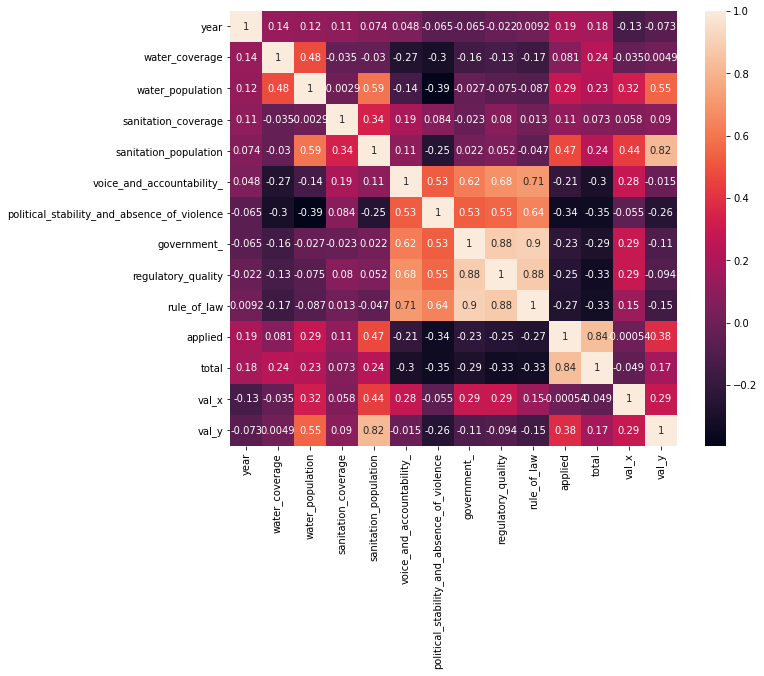

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix=data.corr(method='pearson')
corr_matrix

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [43]:
data = data.drop(['year','country'],axis=1)

X = data.drop(['total'],axis=1)
y = data['total']

X.head(5)
y.head(5)

,water_coverage,water_population,service_level,sanitation_coverage,sanitation_population,voice_and_accountability_,political_stability_and_absence_of_violence,government_,regulatory_quality,rule_of_law,applied,val_x,val_y,form_of_government,control_cat
1,20.01438,3.517056e+06,Limited service,12.41406,2.181480e+06,12.935324,9.523809,8.163265,6.632653,2.970297,5758,8796.521342,171.346316,presidential unitary republic,low
5,19.40718,3.532760e+06,Limited service,12.98003,2.362802e+06,10.945273,19.597990,9.183674,11.224490,4.455446,4035,9819.589107,164.473562,presidential unitary republic,low
9,18.79056,3.544974e+06,Limited service,13.55016,2.556334e+06,11.538462,16.504854,6.403941,9.852217,5.741627,4004,10853.375345,166.662138,presidential unitary republic,low
13,18.16428,3.551578e+06,Limited service,14.12307,2.761419e+06,12.019231,21.359222,12.254902,10.294118,7.177033,3168,11756.413023,157.578053,presidential unitary republic,low
17,17.50080,3.546083e+06,Limited service,14.61931,2.962223e+06,11.538462,27.536232,5.853659,13.235294,9.090909,2525,12350.510032,144.658240,presidential unitary republic,low


1     15744
5     14057
9     11940
13    12003
17     9807
Name: total, dtype: int64

In [44]:
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes('object')

X_num.head(5)
X_cat.head(5)

,water_coverage,water_population,sanitation_coverage,sanitation_population,voice_and_accountability_,political_stability_and_absence_of_violence,government_,regulatory_quality,rule_of_law,applied,val_x,val_y
1,20.01438,3.517056e+06,12.41406,2.181480e+06,12.935324,9.523809,8.163265,6.632653,2.970297,5758,8796.521342,171.346316
5,19.40718,3.532760e+06,12.98003,2.362802e+06,10.945273,19.597990,9.183674,11.224490,4.455446,4035,9819.589107,164.473562
9,18.79056,3.544974e+06,13.55016,2.556334e+06,11.538462,16.504854,6.403941,9.852217,5.741627,4004,10853.375345,166.662138
13,18.16428,3.551578e+06,14.12307,2.761419e+06,12.019231,21.359222,12.254902,10.294118,7.177033,3168,11756.413023,157.578053
17,17.50080,3.546083e+06,14.61931,2.962223e+06,11.538462,27.536232,5.853659,13.235294,9.090909,2525,12350.510032,144.658240


,service_level,form_of_government,control_cat
1,Limited service,presidential unitary republic,low
5,Limited service,presidential unitary republic,low
9,Limited service,presidential unitary republic,low
13,Limited service,presidential unitary republic,low
17,Limited service,presidential unitary republic,low


In [45]:
def plot_var(df):
    col_names_d = X_num.columns.tolist()
    for i in range(len(col_names_d)):
        print('for variable',col_names_d[i])
        plt.hist(df.iloc[:,i],bins=20)
        plt.show()
        
def plot_var_box(df):
    col_names_c = df.columns.tolist()
    for i in range(len(col_names_c)):
        print('for variable',col_names_c[i])
        sns.boxplot(df.iloc[:,i])
        plt.show()
        #return df.iloc[i]
    #return plt.show()
def plot_cat(df):
    col_names_cat = X_cat.columns.tolist()
    for i in range(len(col_names_cat)):
        print('for variable',col_names_cat[i])
        plt.hist(df.iloc[:,i])
        plt.gca().set(title='Frequency Histogram', ylabel='Frequency')
        plt.show()

def plot_count_cat(df):
    col_names_cat = X_cat.columns.tolist()
    for i in range(len(col_names_cat)):
        print('for variable',col_names_cat[i])
        sns.countplot(df.iloc[:,i])
        plt.show()

for variable water_coverage


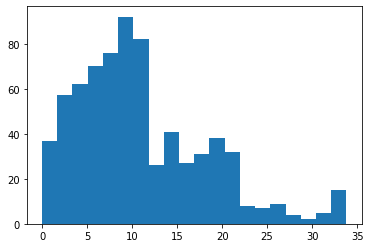

for variable water_population


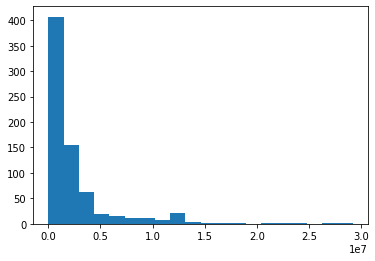

for variable sanitation_coverage


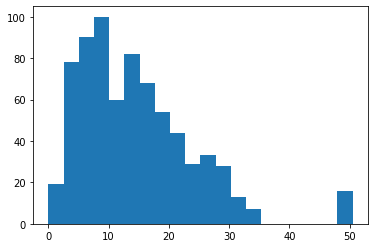

for variable sanitation_population


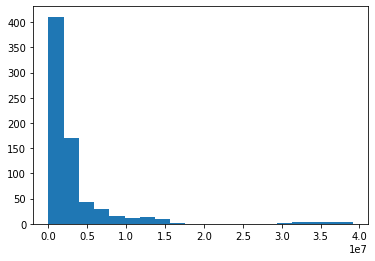

for variable voice_and_accountability_


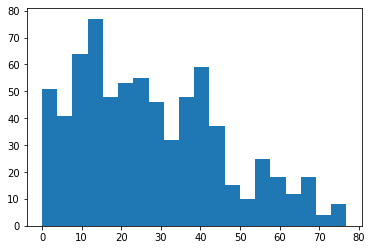

for variable political_stability_and_absence_of_violence


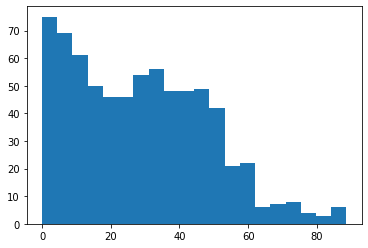

for variable government_


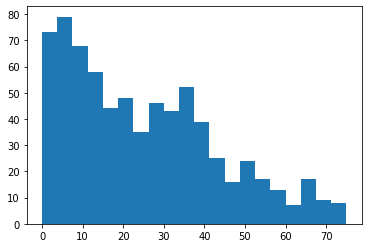

for variable regulatory_quality


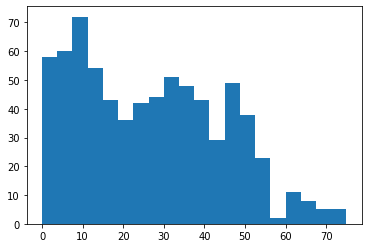

for variable rule_of_law


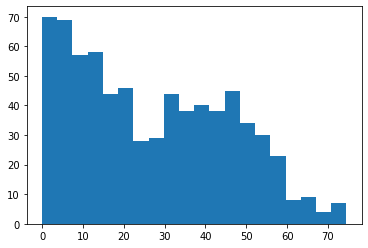

for variable applied


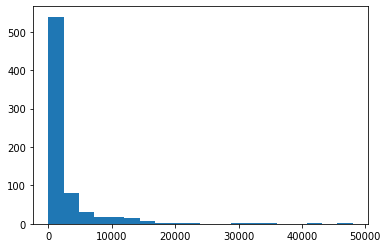

for variable val_x


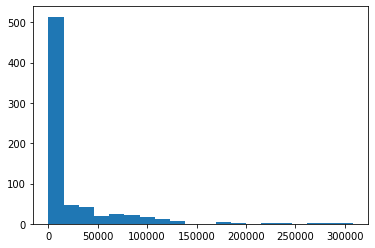

for variable val_y


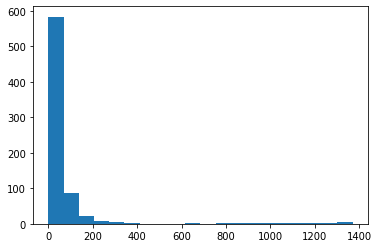

In [46]:
plot_var(X_num)

for variable service_level


/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


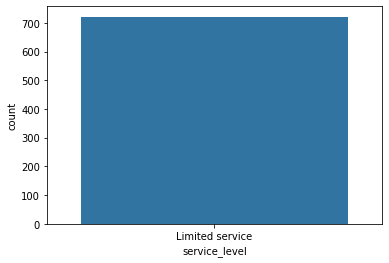

for variable form_of_government


/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


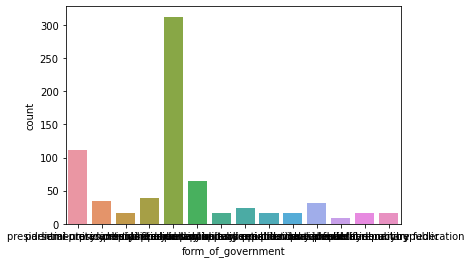

for variable control_cat


/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


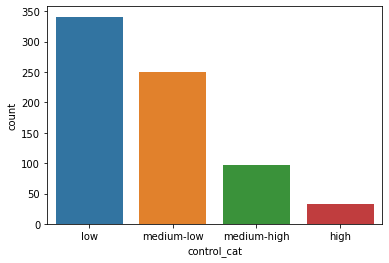

In [47]:
plot_count_cat(X_cat)

for variable water_coverage


/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


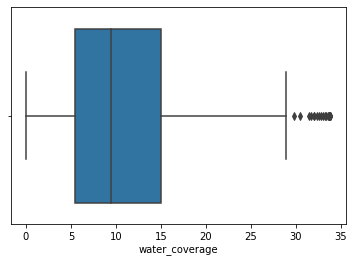

for variable water_population


/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


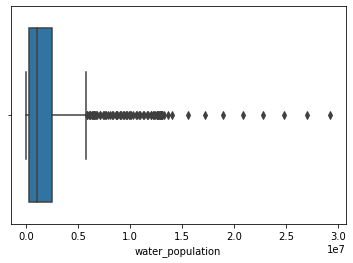

for variable sanitation_coverage


/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


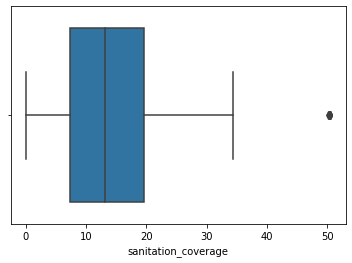

for variable sanitation_population


/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


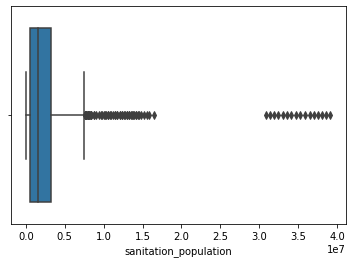

for variable voice_and_accountability_


/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


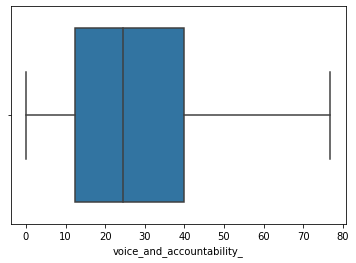

for variable political_stability_and_absence_of_violence


/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


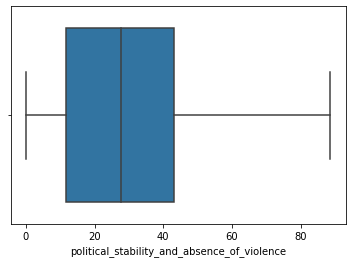

for variable government_


/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


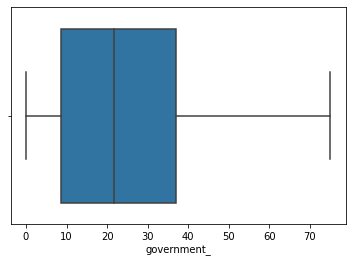

for variable regulatory_quality


/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


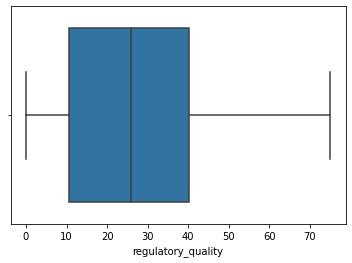

for variable rule_of_law


/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


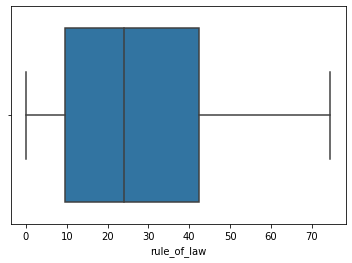

for variable applied


/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


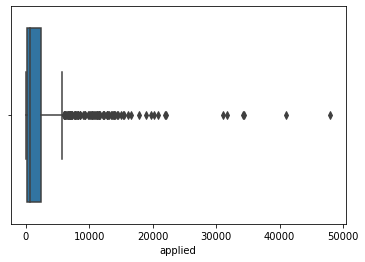

for variable val_x


/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


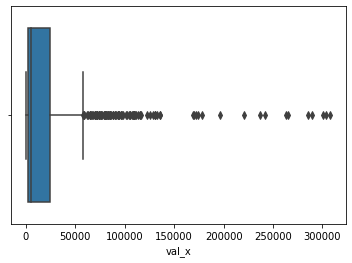

for variable val_y


/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


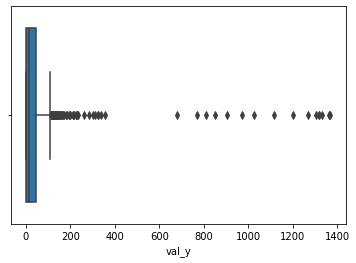

In [48]:
plot_var_box(X_num)

In [ ]:
#there seems to be some outliers but they may not be errors. So we are keeping it for now.

In [49]:
#defining a function to convert variables in categorical functions

#already done above

# Train-test split

In [63]:
X_cat = X_cat.drop(['service_level'],axis=1)
X = pd.concat([X_num,X_cat],axis=1)

X.head()
y.head()



,water_coverage,water_population,sanitation_coverage,sanitation_population,voice_and_accountability_,political_stability_and_absence_of_violence,government_,regulatory_quality,rule_of_law,applied,val_x,val_y,form_of_government,control_cat
1,20.01438,3.517056e+06,12.41406,2.181480e+06,12.935324,9.523809,8.163265,6.632653,2.970297,5758,8796.521342,171.346316,presidential unitary republic,low
5,19.40718,3.532760e+06,12.98003,2.362802e+06,10.945273,19.597990,9.183674,11.224490,4.455446,4035,9819.589107,164.473562,presidential unitary republic,low
9,18.79056,3.544974e+06,13.55016,2.556334e+06,11.538462,16.504854,6.403941,9.852217,5.741627,4004,10853.375345,166.662138,presidential unitary republic,low
13,18.16428,3.551578e+06,14.12307,2.761419e+06,12.019231,21.359222,12.254902,10.294118,7.177033,3168,11756.413023,157.578053,presidential unitary republic,low
17,17.50080,3.546083e+06,14.61931,2.962223e+06,11.538462,27.536232,5.853659,13.235294,9.090909,2525,12350.510032,144.658240,presidential unitary republic,low


1     15744
5     14057
9     11940
13    12003
17     9807
Name: total, dtype: int64

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [65]:
numericals_train = X_train.select_dtypes(np.number)
numericals_test = X_test.select_dtypes(np.number)
numericals_train.head()

,water_coverage,water_population,sanitation_coverage,sanitation_population,voice_and_accountability_,political_stability_and_absence_of_violence,government_,regulatory_quality,rule_of_law,applied,val_x,val_y
3003,32.02842,1.328794e+07,17.29818,7.176661e+06,28.571428,21.428572,32.692307,46.153847,45.192307,593,31273.894238,25.359452
1889,5.14846,5.352779e+05,10.96788,1.140315e+06,59.701492,35.978836,57.653061,46.938774,56.435642,1115,3565.630939,38.683360
445,11.52177,7.434219e+06,21.43991,1.383373e+07,9.478673,3.317536,1.435407,4.306220,1.895735,7225,41325.288010,139.802236
2293,6.90409,1.078487e+06,16.71459,2.610982e+06,44.334976,52.380951,33.173077,32.692307,47.115383,15,26686.554070,11.882579
1961,11.72631,1.186261e+06,15.43028,1.560962e+06,1.923077,0.485437,0.000000,0.492611,0.000000,3998,4905.427009,42.993248


In [66]:
transformer = StandardScaler().fit(numericals_train) #this line teaches standardscaler where points are, subtracting mean to it, and dividing by standard deviation
numericals_train_standardized = transformer.transform(numericals_train) #this line transforms based on what it learned in the previous line
numericals_test_standardized = transformer.transform(numericals_test) 
numericals_test_standardized

array([[ 1.13365263, -0.43361311, -0.59264291, ...,  0.58615579,
        -0.45190352, -0.28717986],
       [-1.11857001, -0.55143427,  0.25654543, ...,  2.23117149,
        -0.47619834, -0.24433489],
       [-0.87239644, -0.49330508,  0.22056158, ..., -0.27798031,
        -0.36670925,  0.3763814 ],
       ...,
       [-1.06986556, -0.6627572 , -0.49057855, ..., -0.52698593,
        -0.47588754, -0.32799972],
       [-1.30574442, -0.58526139,  0.05082906, ..., -0.50483513,
        -0.41078663, -0.28005924],
       [ 1.10395832,  0.33127952, -0.15037034, ..., -0.49516006,
        -0.0480353 , -0.27329613]])

In [67]:
X_train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 504 entries, 3003 to 2081
Data columns (total 14 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   water_coverage                               504 non-null    float64
 1   water_population                             504 non-null    float64
 2   sanitation_coverage                          504 non-null    float64
 3   sanitation_population                        504 non-null    float64
 4   voice_and_accountability_                    504 non-null    float64
 5   political_stability_and_absence_of_violence  504 non-null    float64
 6   government_                                  504 non-null    float64
 7   regulatory_quality                           504 non-null    float64
 8   rule_of_law                                  504 non-null    float64
 9   applied                                      504 non-null    int64  
 10

In [68]:
#now encoding the categorical variables

categoricals_train= X_train.select_dtypes(np.object)
categoricals_test= X_test.select_dtypes(np.object)
categoricals_train.head()

<ipython-input-68-4aceaaae8cee>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals_train= X_train.select_dtypes(np.object)
<ipython-input-68-4aceaaae8cee>:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals_test= X_test.select_dtypes(np.object)


,form_of_government,control_cat
3003,presidential unitary republic,low
1889,presidential unitary republic,medium-high
445,semi-presidential unitary republic,low
2293,presidential unitary republic,medium-low
1961,semi-presidential federal republic,high


In [69]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(categoricals_train) #drop=first, drops one of the values so we don't have redundant
categoricals_train_encoded = encoder.transform(categoricals_train).toarray()
categoricals_test_encoded = encoder.transform(categoricals_test).toarray()

In [70]:
X_train
categoricals_train_encoded

,water_coverage,water_population,sanitation_coverage,sanitation_population,voice_and_accountability_,political_stability_and_absence_of_violence,government_,regulatory_quality,rule_of_law,applied,val_x,val_y,form_of_government,control_cat
3003,32.02842,1.328794e+07,17.29818,7.176661e+06,28.571428,21.428572,32.692307,46.153847,45.192307,593,31273.894238,25.359452,presidential unitary republic,low
1889,5.14846,5.352779e+05,10.96788,1.140315e+06,59.701492,35.978836,57.653061,46.938774,56.435642,1115,3565.630939,38.683360,presidential unitary republic,medium-high
445,11.52177,7.434219e+06,21.43991,1.383373e+07,9.478673,3.317536,1.435407,4.306220,1.895735,7225,41325.288010,139.802236,semi-presidential unitary republic,low
2293,6.90409,1.078487e+06,16.71459,2.610982e+06,44.334976,52.380951,33.173077,32.692307,47.115383,15,26686.554070,11.882579,presidential unitary republic,medium-low
1961,11.72631,1.186261e+06,15.43028,1.560962e+06,1.923077,0.485437,0.000000,0.492611,0.000000,3998,4905.427009,42.993248,semi-presidential federal republic,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2313,8.17498,1.032818e+06,19.46117,2.458704e+06,9.950249,18.592964,13.775510,2.040816,0.990099,314,109811.150110,1.363823,presidential unitary republic,low
213,19.13317,2.726863e+06,15.48557,2.207007e+06,36.538460,54.589371,24.757282,46.116505,42.105263,338,9759.536758,74.619213,presidential unitary republic,medium-low
1401,2.18668,4.372578e+05,10.77306,2.154232e+06,35.576923,29.807692,30.097088,44.174759,38.942307,20,3861.963350,12.909139,semi-presidential devolved republic,medium-low
317,17.79255,7.836248e+05,13.05530,5.749855e+05,19.905212,4.739336,5.263158,8.133971,7.582938,182,9945.880796,20.377532,presidential unitary republic,low


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [72]:
X_train = np.concatenate((numericals_train_standardized,categoricals_train_encoded),axis=1)
X_test = np.concatenate((numericals_test_standardized,categoricals_test_encoded),axis=1)

In [73]:
def func_train_test(model): #lm= list of models
    if model == 'LinearRegression':
        LR = LR = linear_model.LinearRegression()
        LR.fit(X_train,y_train)
        score = LR.score(X_test, y_test)
        y_pred= LR.predict(X_test)
        return print('R2 score of LR model is: ',r2_score(y_test, y_pred),'& score is: ',score)
    elif model == 'KNeighborsRegressor':
        KNN = KNeighborsRegressor(n_neighbors=2)
        KNN.fit(X_train, y_train)
        score = KNN.score(X_test, y_test)
        return print('KNeighborscore is: ',score)
    elif model == 'MLPRegressor':
        regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
        regr.predict(X_test)
        MLPscore = regr.score(X_test, y_test)
        return print('MLPscore is: ',MLPscore)
    else:
        return print('no model applicable')

In [74]:
func_train_test('LinearRegression')


R2 score of LR model is:  0.8163973899867216 & score is:  0.8163973899867216


In [75]:
func_train_test('KNeighborsRegressor')

KNeighborscore is:  0.924138043653442


In [76]:
func_train_test('MLPRegressor')


MLPscore is:  -0.004815958474847282


/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [77]:
scores = []
for k in range(2,14):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

scores

KNeighborsRegressor(n_neighbors=2)

KNeighborsRegressor(n_neighbors=3)

KNeighborsRegressor(n_neighbors=4)

KNeighborsRegressor()

KNeighborsRegressor(n_neighbors=6)

KNeighborsRegressor(n_neighbors=7)

KNeighborsRegressor(n_neighbors=8)

KNeighborsRegressor(n_neighbors=9)

KNeighborsRegressor(n_neighbors=10)

KNeighborsRegressor(n_neighbors=11)

KNeighborsRegressor(n_neighbors=12)

KNeighborsRegressor(n_neighbors=13)

[0.924138043653442,
 0.9118473364294714,
 0.8835819257468323,
 0.8585835881475069,
 0.8388832440940647,
 0.8057147282662847,
 0.7772659488849508,
 0.7804198763603594,
 0.7647021165974067,
 0.7439906450343527,
 0.7359734822438184,
 0.728557721179651]

<Figure size 360x720 with 0 Axes>

Text(0.5, 1.0, 'accuracy scores vs. K Value')

Text(0.5, 0, 'K')

Text(0, 0.5, 'Accuracy')

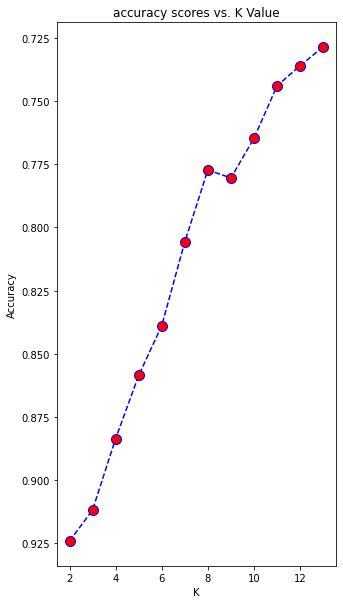

In [78]:
plt.figure(figsize=(5,10))
plt.plot(range(2,14),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('accuracy scores vs. K Value')
plt.gca().invert_yaxis()
plt.xlabel('K')
plt.ylabel('Accuracy')
